# Máximo elemento de un arreglo

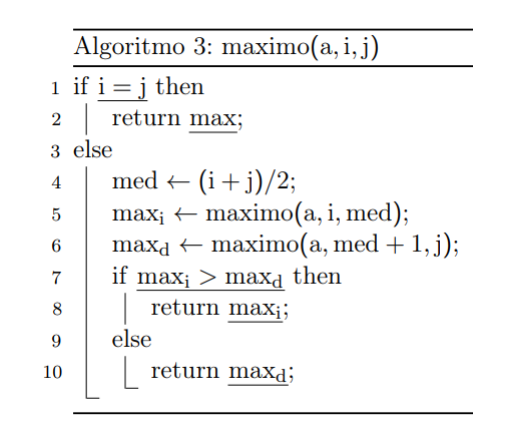

In [ ]:
import random as r

lst = [r.randint(0, 50) for _ in range(0, 10)]

print('Array:', lst)

def maxElement(lst, l, r):
    if l == r:
        # Se trata de un arreglo con un único iem
        return lst[l]
    else:
        # (1) Dividir
        med = (l + r) // 2 # retornar solo la parte entera
        # (2) Conquistar, significa la(s) llamada(s) recursivas
        # Máximo de la parte izquierda del arreglo
        maxl = maxElement(lst, l, med)
        # Máximo de la parte derecha del arreglo
        maxr = maxElement(lst, med + 1, r)
        # (3) Combinar
        if maxl > maxr:
            return maxl
        else:
            return maxr

def maximun(lst):
    return maxElement(lst, 0, len(lst) - 1)

print(maximun(lst))



Array: [28, 13, 7, 24, 43, 24, 10, 44, 7, 50]
50


# Multiplicación de enteros de n cifras

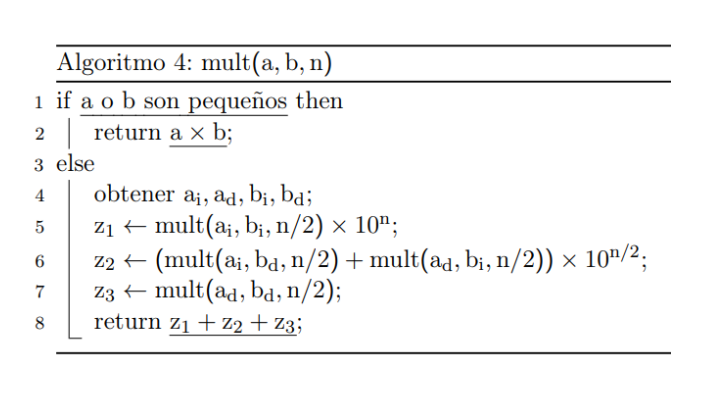

In [ ]:
"""
a = 98765678
b = 24680135

a x b = 2,437,550,406,530
"""

def mult(a, b, n):
    if n == 1:
        return a * b
    else:
        # (1) Divide
        # Parte derecha e izquierda de a
        ai = a // 10 ** (n // 2)
        ad = a % 10 ** (n // 2)
        # Parte derecha e izquierda de b
        bi = b // 10 ** (n // 2)
        bd = b % 10 ** (n // 2)
        # (2) Conquista
        # Llamadas recursivas a la función mult
        # 1ero: parte izquierda de cada número
        z1 = mult(ai, bi, n // 2) * 10 ** n
        # 2do:  
        # (a) Multiplicamos la parte izq de a con la derecha de b
        # (a) Multiplicamos la parte der de a con la izquierda de b
        # Sumar (a) + (b) y el resultado se multiplica por 10 ** (n // 2)
        z2 = (mult(ai, bd, n // 2) + mult(ad, bi, n // 2)) * 10 ** (n // 2)
        z3 = mult(ad, bd, n // 2)
        return z1 + z2 + z3 

In [ ]:
a = 98765678
b = 24680135

result = mult(a, b, 8)
print(result)

2437550266406530


In [ ]:
a * b == 2437550266406530

True

In [ ]:
# Si es True no devuelve ningún mensaje de error
assert mult(a, b, 8) == 2437550266406530

# Multiplicación de arreglos

## (1) A través de la función **matmul()** de numpy

In [ ]:
import numpy as np

In [56]:
# Generación de arreglo automático
a = np.random.randint(10, size = (4, 4))
b = np.random.randint(10, size = (4, 4))

print(a)
print(b)

[[0 5 3 6]
 [1 3 9 5]
 [3 4 8 0]
 [6 0 6 2]]
[[7 9 9 0]
 [0 8 3 1]
 [8 9 7 4]
 [1 9 2 7]]


In [ ]:
c = np.matmul(a, b)
print(c)

[[ 62 125]
 [ 82  91]
 [ 36  48]]


## (2) Solución clásica

In [ ]:
def matmul(a, b):
    # Retorna la cantidad de filas y columnnas del arreglo
    a_rows, a_cols = a.shape
    b_rows, b_cols = b.shape
    # Si son diferentes el # de filas y columnas
    if a_cols != b_rows:
        return None
    c_ans = np.zeros((a_rows, b_cols))

    for i in range(a_rows):
        for j in range(b_cols):
            temp = 0
            for k in range(a_cols):
                temp += a[i, k] * b[k, j]
            c_ans[i, j] = temp
    return c_ans

print(matmul(a, b))

[[ 62. 125.]
 [ 82.  91.]
 [ 36.  48.]]


In [ ]:
np.matmul(a, b) == matmul(a, b)

array([[ True,  True],
       [ True,  True],
       [ True,  True]])

In [ ]:
assert matmul(a, b).all() == np.matmul(a, b).all()

## (3) Solución con recursividad

In [53]:
"""
Multiplicar a y b. El resultado lo guardamos en un arreglo c:
i -> fila inicial del arreglo a
ii -> fila final del arreglo a
j -> fila inicial del arreglo b
jj -> fila final del arreglo b
"""

def matmul_r(a,b,c,i,ii,j,jj):
  if i == ii:
    
    temp=0
    for k in range(len(a)):
      temp += a[i,k] * b[k,j]
      #(3) Combinar -> toda operacion fuera de la llamada recursiva
      c[i][j] = temp
  else:
    #(1) Dividir
    # Dividimos el arreglo a en 2
    imid = (i + ii) // 2

    # Dividimos el arreglo b en 2
    jmid = (j + jj) // 2

    #(2) Conquistar, significa ejecutar la recursividad
    
    #(a) Calculo de la 1ra mitad del arreglo a con la 1ra mitad del arreglo b
    matmul_r(a,b,c,i,imid,j,jmid)
    #(b) Calculo de la 2da parte de a con la 1ra parte de b
    matmul_r(a,b,c,imid+1,ii,j,jmid)
    #(c) Calculo de la 1ra parte de a con la 2da parte de b
    matmul_r(a,b,c,i,imid,jmid+1,jj)
    #(d) Calculo de la 2da parte de a con la 2da parte de b
    matmul_r(a,b,c,imid+1,ii,jmid+1,jj)



In [ ]:
c_rec = np.zeros((4, 4))
print(c_rec)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [57]:
# Ejecución de la función recursiva
matmul_r(a, b, c_rec, 0, len(a) - 1, 0, len(b) - 1)
print(c_rec)

[[ 30. 121.  48.  59.]
 [ 84. 159.  91.  74.]
 [ 85. 131.  95.  36.]
 [ 92. 126. 100.  38.]]
